# Gaussian Mixture Models (GMM) Clustering

This notebook demonstrates Gaussian Mixture Models for clustering. GMM assumes data is generated from a mixture of several Gaussian distributions and uses Expectation-Maximization (EM) algorithm to estimate parameters.

## Algorithm Overview
- Models data as a mixture of k Gaussian distributions
- Uses EM algorithm to find maximum likelihood estimates
- Provides soft assignments (probabilities) rather than hard assignments
- Can handle clusters of different shapes and sizes


In [1]:
# Install required packages (uncomment if needed)
# !pip install scikit-learn matplotlib seaborn numpy

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## Generate Synthetic Dataset


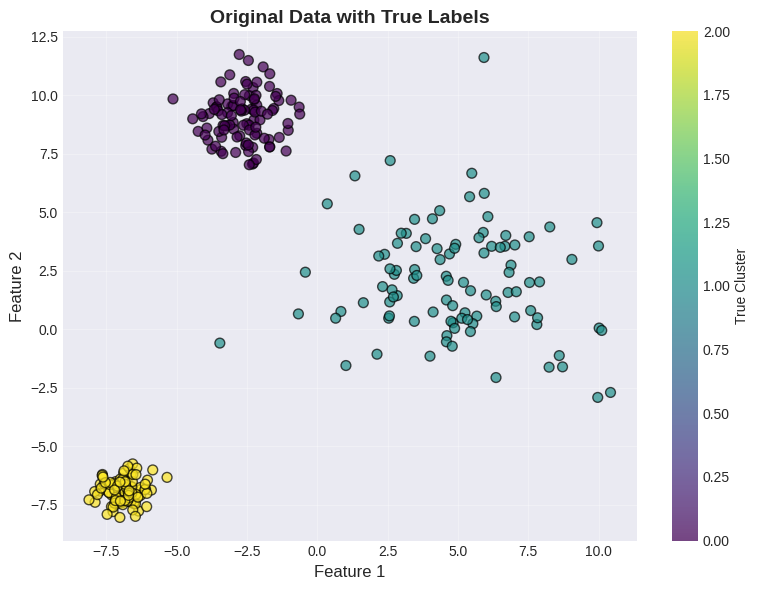

Dataset shape: (300, 2)
Number of clusters: 3


In [2]:
# Generate synthetic dataset with elliptical clusters
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2,
                       random_state=42, cluster_std=[1.0, 2.5, 0.5])

# Visualize original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('Original Data with True Labels', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of clusters: {len(np.unique(y_true))}")


## Apply Gaussian Mixture Model Clustering


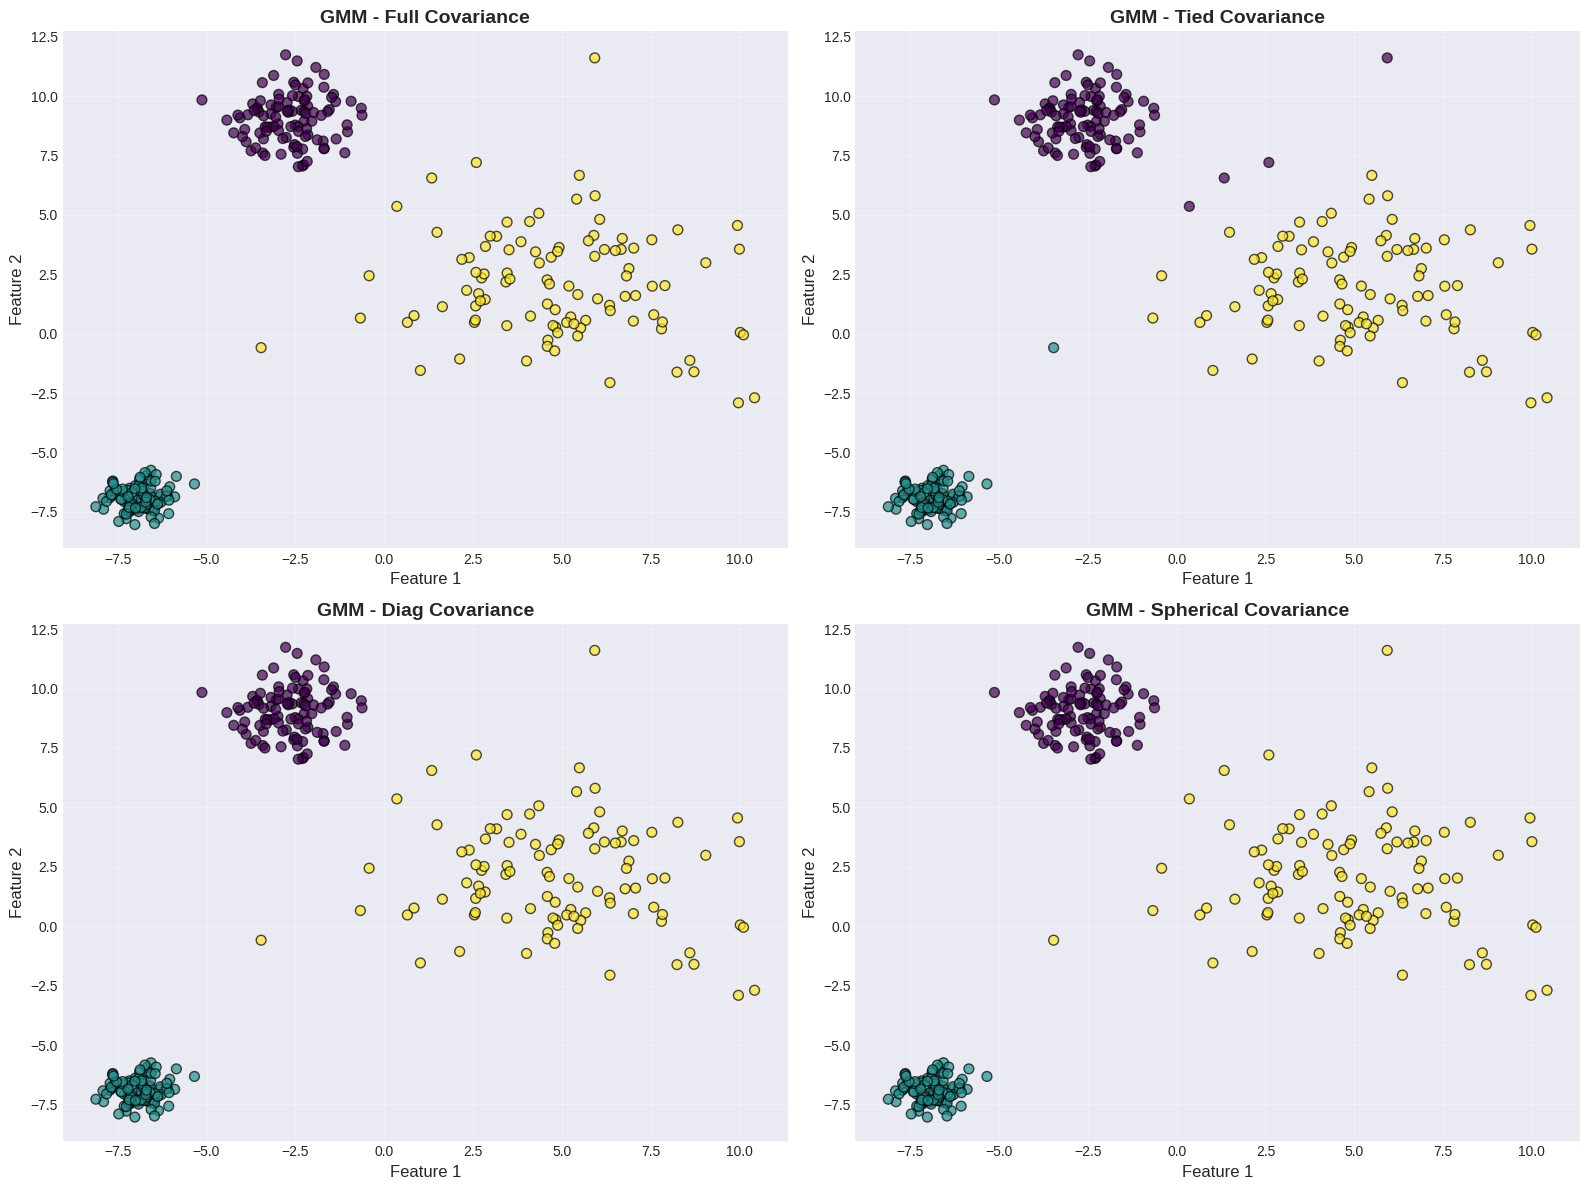

CLUSTERING QUALITY METRICS

FULL COVARIANCE:
  Silhouette Score: 0.7830
  Adjusted Rand Index: 1.0000
  Davies-Bouldin Index: 0.3535
  AIC: 2444.29
  BIC: 2507.25
  Converged: True

TIED COVARIANCE:
  Silhouette Score: 0.7871
  Adjusted Rand Index: 0.9507
  Davies-Bouldin Index: 0.3465
  AIC: 2862.30
  BIC: 2903.04
  Converged: True

DIAG COVARIANCE:
  Silhouette Score: 0.7830
  Adjusted Rand Index: 1.0000
  Davies-Bouldin Index: 0.3535
  AIC: 2440.58
  BIC: 2492.44
  Converged: True

SPHERICAL COVARIANCE:
  Silhouette Score: 0.7830
  Adjusted Rand Index: 1.0000
  Davies-Bouldin Index: 0.3535
  AIC: 2437.87
  BIC: 2478.61
  Converged: True


In [3]:
# Apply GMM with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = 3

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

results = {}

for idx, cov_type in enumerate(covariance_types):
    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type,
                         random_state=42, max_iter=100)
    gmm.fit(X)
    labels = gmm.predict(X)
    probabilities = gmm.predict_proba(X)

    # Visualize
    scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                               s=50, alpha=0.7, edgecolors='k')
    axes[idx].set_title(f'GMM - {cov_type.capitalize()} Covariance',
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1', fontsize=12)
    axes[idx].set_ylabel('Feature 2', fontsize=12)
    axes[idx].grid(True, alpha=0.3)

    # Calculate metrics
    silhouette = silhouette_score(X, labels)
    ari = adjusted_rand_score(y_true, labels)
    db_score = davies_bouldin_score(X, labels)
    aic = gmm.aic(X)
    bic = gmm.bic(X)

    results[cov_type] = {
        'labels': labels,
        'probabilities': probabilities,
        'silhouette': silhouette,
        'ari': ari,
        'davies_bouldin': db_score,
        'aic': aic,
        'bic': bic,
        'converged': gmm.converged_
    }

plt.tight_layout()
plt.show()

# Print metrics
print("=" * 70)
print("CLUSTERING QUALITY METRICS")
print("=" * 70)
for cov_type, metrics in results.items():
    print(f"\n{cov_type.upper()} COVARIANCE:")
    print(f"  Silhouette Score: {metrics['silhouette']:.4f}")
    print(f"  Adjusted Rand Index: {metrics['ari']:.4f}")
    print(f"  Davies-Bouldin Index: {metrics['davies_bouldin']:.4f}")
    print(f"  AIC: {metrics['aic']:.2f}")
    print(f"  BIC: {metrics['bic']:.2f}")
    print(f"  Converged: {metrics['converged']}")
print("=" * 70)


## Visualize Soft Assignments (Probabilities)


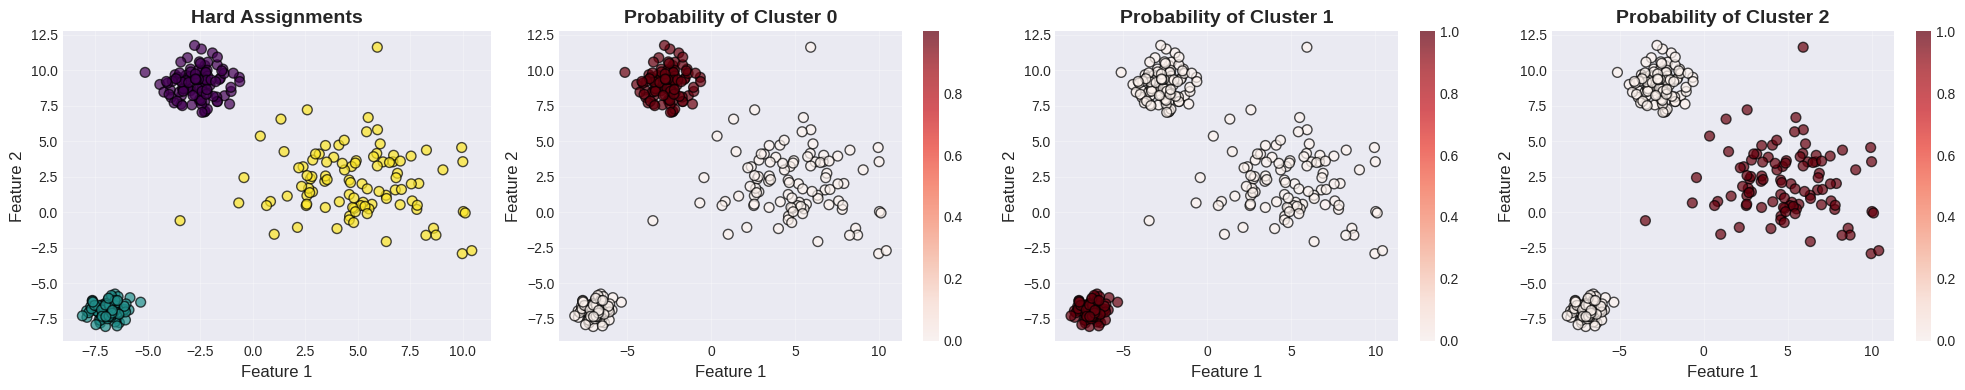

In [4]:
# Visualize soft assignments for full covariance type
gmm_full = GaussianMixture(n_components=n_components, covariance_type='full',
                          random_state=42, max_iter=100)
gmm_full.fit(X)
labels_full = gmm_full.predict(X)
probabilities_full = gmm_full.predict_proba(X)

fig, axes = plt.subplots(1, n_components + 1, figsize=(20, 4))

# Hard assignments
axes[0].scatter(X[:, 0], X[:, 1], c=labels_full, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[0].set_title('Hard Assignments', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Soft assignments (probabilities) for each component
for k in range(n_components):
    scatter = axes[k + 1].scatter(X[:, 0], X[:, 1], c=probabilities_full[:, k],
                                 cmap='Reds', s=50, alpha=0.7, edgecolors='k')
    axes[k + 1].set_title(f'Probability of Cluster {k}', fontsize=14, fontweight='bold')
    axes[k + 1].set_xlabel('Feature 1', fontsize=12)
    axes[k + 1].set_ylabel('Feature 2', fontsize=12)
    axes[k + 1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[k + 1])

plt.tight_layout()
plt.show()


## Model Selection: AIC and BIC


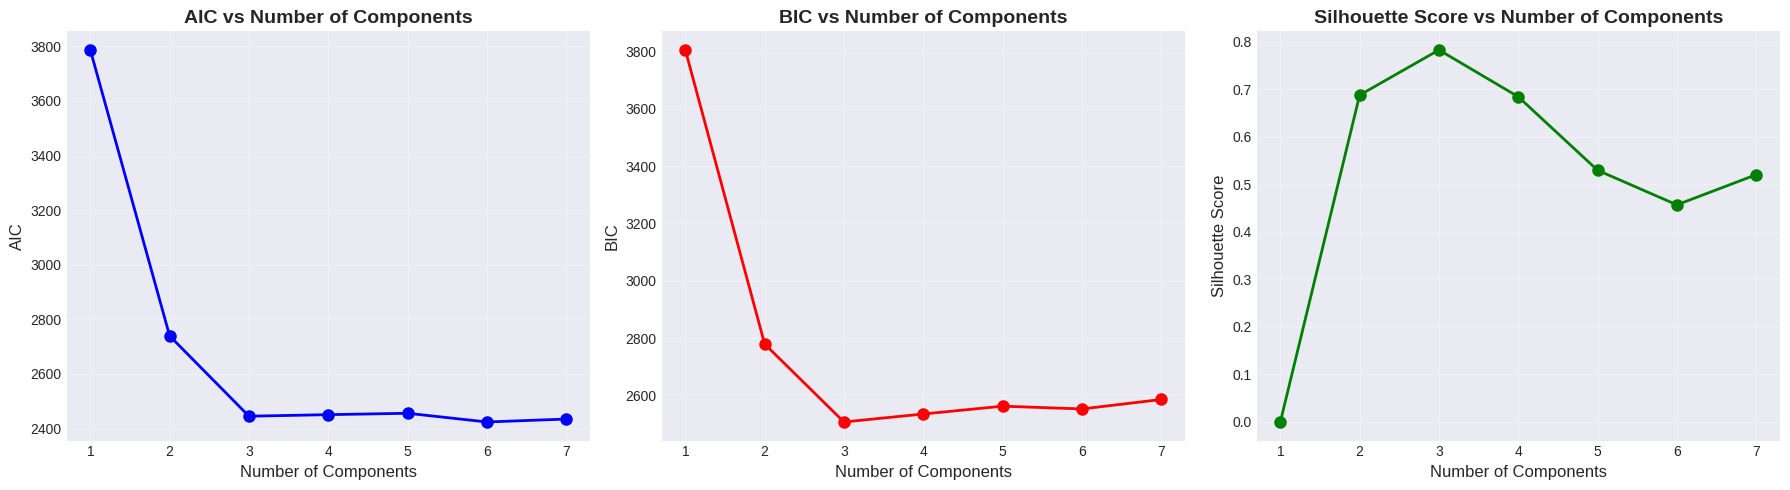

Optimal number of components based on AIC: 6
Optimal number of components based on BIC: 3
Optimal number of components based on Silhouette Score: 3


In [5]:
# Test different numbers of components
n_components_range = range(1, 8)
aic_scores = []
bic_scores = []
silhouette_scores = []

for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, covariance_type='full',
                         random_state=42, max_iter=100)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))
    labels = gmm.predict(X)
    if n_comp > 1:  # Silhouette requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X, labels))
    else:
        silhouette_scores.append(0)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(n_components_range, aic_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Components', fontsize=12)
axes[0].set_ylabel('AIC', fontsize=12)
axes[0].set_title('AIC vs Number of Components', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(n_components_range)

axes[1].plot(n_components_range, bic_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('BIC', fontsize=12)
axes[1].set_title('BIC vs Number of Components', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(n_components_range)

axes[2].plot(n_components_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Components', fontsize=12)
axes[2].set_ylabel('Silhouette Score', fontsize=12)
axes[2].set_title('Silhouette Score vs Number of Components', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(n_components_range)

plt.tight_layout()
plt.show()

optimal_aic = n_components_range[np.argmin(aic_scores)]
optimal_bic = n_components_range[np.argmin(bic_scores)]
optimal_sil = n_components_range[np.argmax(silhouette_scores[1:]) + 1]

print(f"Optimal number of components based on AIC: {optimal_aic}")
print(f"Optimal number of components based on BIC: {optimal_bic}")
print(f"Optimal number of components based on Silhouette Score: {optimal_sil}")


## Real-World Example: Iris Dataset


IRIS DATASET RESULTS
Silhouette Score: 0.4751
Adjusted Rand Index: 0.5165
Davies-Bouldin Index: 0.8867
AIC: 708.72
BIC: 841.19


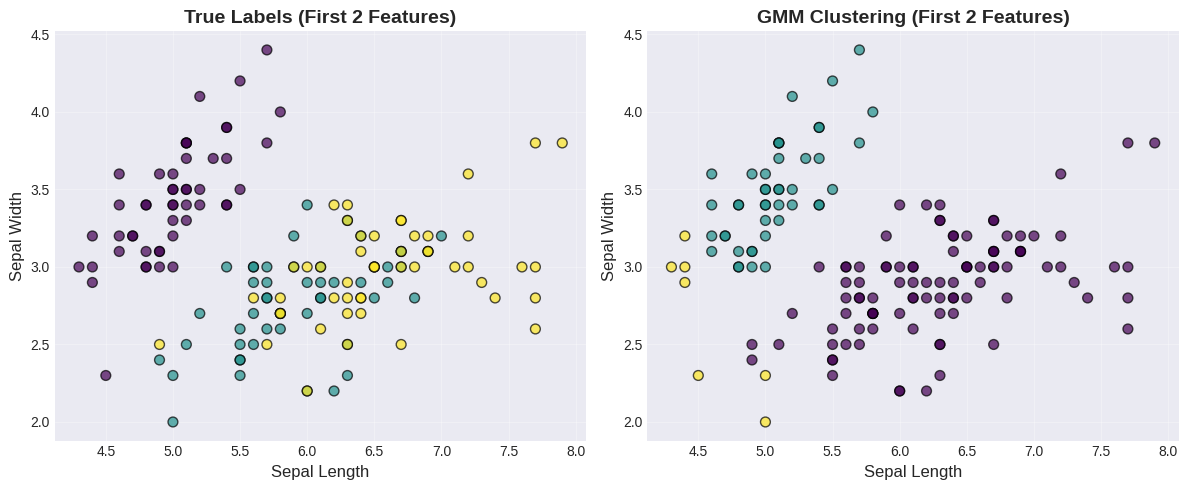

In [6]:
# Load and preprocess Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Apply GMM
gmm_iris = GaussianMixture(n_components=3, covariance_type='full',
                           random_state=42, max_iter=100)
gmm_iris.fit(X_iris_scaled)
y_iris_pred = gmm_iris.predict(X_iris_scaled)

# Calculate metrics
silhouette_iris = silhouette_score(X_iris_scaled, y_iris_pred)
ari_iris = adjusted_rand_score(y_iris, y_iris_pred)
db_iris = davies_bouldin_score(X_iris_scaled, y_iris_pred)
aic_iris = gmm_iris.aic(X_iris_scaled)
bic_iris = gmm_iris.bic(X_iris_scaled)

print("IRIS DATASET RESULTS")
print("=" * 50)
print(f"Silhouette Score: {silhouette_iris:.4f}")
print(f"Adjusted Rand Index: {ari_iris:.4f}")
print(f"Davies-Bouldin Index: {db_iris:.4f}")
print(f"AIC: {aic_iris:.2f}")
print(f"BIC: {bic_iris:.2f}")
print("=" * 50)

# Visualize using first two features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('True Labels (First 2 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('GMM Clustering (First 2 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Handling Non-Spherical Clusters


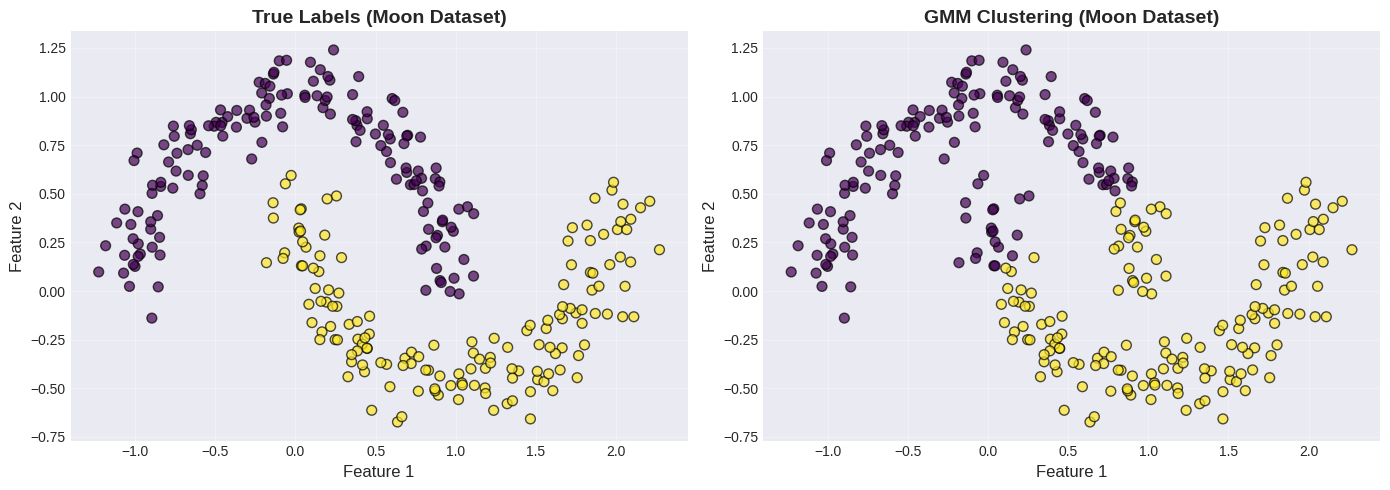

MOON DATASET RESULTS
Silhouette Score: 0.4623
Adjusted Rand Index: 0.4977


In [7]:
# Generate moon-shaped dataset (non-spherical clusters)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply GMM with full covariance (can handle elliptical clusters)
gmm_moons = GaussianMixture(n_components=2, covariance_type='full',
                           random_state=42, max_iter=100)
gmm_moons.fit(X_moons)
labels_moons = gmm_moons.predict(X_moons)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis',
               s=50, alpha=0.7, edgecolors='k')
axes[0].set_title('True Labels (Moon Dataset)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis',
               s=50, alpha=0.7, edgecolors='k')
axes[1].set_title('GMM Clustering (Moon Dataset)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

silhouette_moons = silhouette_score(X_moons, labels_moons)
ari_moons = adjusted_rand_score(y_moons, labels_moons)

print("MOON DATASET RESULTS")
print("=" * 50)
print(f"Silhouette Score: {silhouette_moons:.4f}")
print(f"Adjusted Rand Index: {ari_moons:.4f}")
print("=" * 50)


## Summary

This notebook demonstrated:
1. Gaussian Mixture Models for clustering using scikit-learn
2. Different covariance types (full, tied, diag, spherical)
3. Soft assignments (probabilistic clustering)
4. Model selection using AIC and BIC
5. Handling non-spherical clusters

### Key Takeaways:
- GMM provides soft assignments (probabilities) rather than hard assignments
- Different covariance types allow modeling different cluster shapes
- AIC and BIC help select optimal number of components
- GMM can handle elliptical clusters better than K-Means
- EM algorithm iteratively estimates parameters to maximize likelihood
